In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Credit Default File
cred_df = pd.read_csv("default.csv")


In [2]:
cred_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


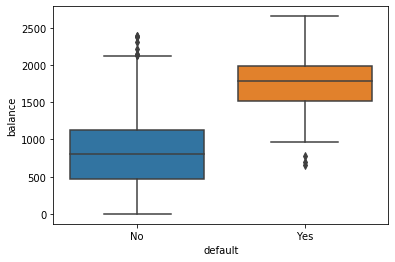

In [4]:
sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()

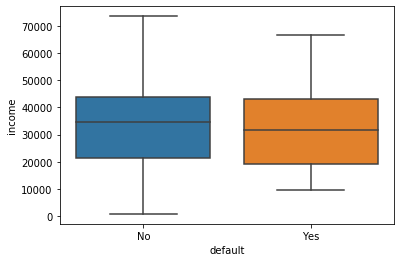

In [5]:
sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

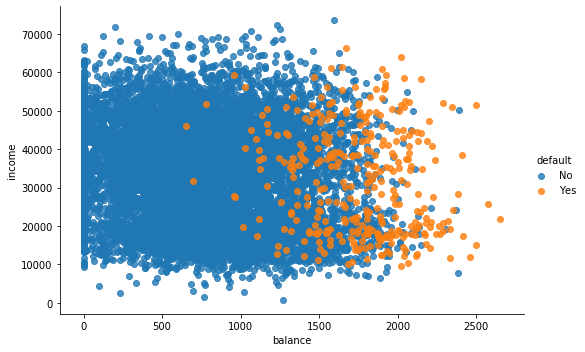

In [6]:
sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=1.5, ci = None, fit_reg = False)
plt.show()

In [7]:
pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


In [8]:
# Convert Categorical to Numerical
default_dummies = pd.get_dummies(cred_df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()

,default,student,balance,income,default_Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


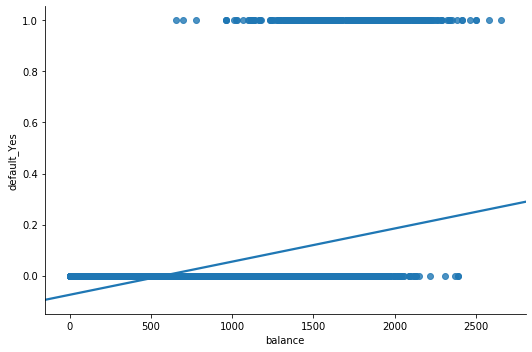

In [9]:
# Try simple linear regression on the data
sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, ci = None, fit_reg = True)

In [10]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression

X = cred_df[['balance']]
y = cred_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_)
print(linreg.intercept_)

[0.00012987]
-0.07519195884622268


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.00530412]]
[-10.32691114]


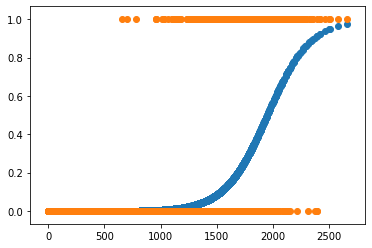

In [11]:
# Building the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42) # Set Large C value for low regularization
logreg.fit(X, y)

print(logreg.coef_)
print(logreg.intercept_)

y_pred = logreg.predict_proba(X)
plt.scatter(X.values, y_pred[:,1])
plt.scatter(X.values, y)
plt.show()

## Appendix Code for Demonstration

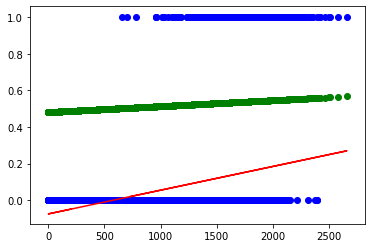

In [12]:
x = X.values
y_hat = linreg.intercept_ + linreg.coef_ * x
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))

plt.plot(x, y_hat, color='red')
plt.scatter(x, y, color = 'blue')
plt.scatter(x, sig_y_hat, color = 'green')
plt.show()

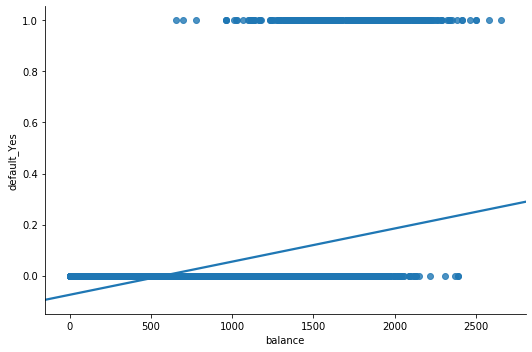

In [13]:
sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, ci = None, fit_reg = True)

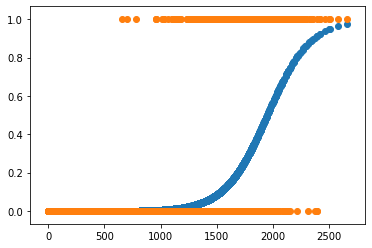

In [14]:
#plt.plot(x, sig_y_hat)
x = X
y_hat = logreg.intercept_ + logreg.coef_ * x
sig_y_hat = np.exp(y_hat)/(1+np.exp(y_hat))

plt.scatter(x=x, y=sig_y_hat)
plt.scatter(x=x, y=y)
#plt.scatter(x=x, y=y_hat)
plt.show()

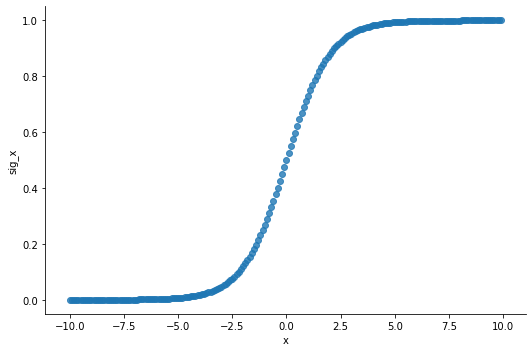

In [15]:
x = np.arange(-10,10,0.1)
sig_x = np.exp(x)/(1+np.exp(x))
df = pd.DataFrame(list(zip(x,sig_x)), columns = ['x', 'sig_x'])
sns.lmplot(x='x', y='sig_x', data=df, aspect=1.5, ci = None, fit_reg = False)
plt.show()

#### Creating logistic model

In [16]:
#splitting the independent and dependent attributes
cred_df = pd.get_dummies(cred_df, columns=["student"])
X = cred_df.drop('default',1)
y = cred_df['default']

In [18]:
#splitting the data into train and test with 70:30 ratio
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30)

In [19]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=.1)

In [20]:
#fitting the model with x and y attributes of train data
#in this it is goin to learn the pattern
logreg.fit(xTrain, yTrain)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#now applying our learnt model on test and also ontrain data
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [22]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTest, y_log_pred_test)

0.9906666666666667

In [23]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTrain, y_log_pred_train)

0.9942857142857143

In [24]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(yTest, y_log_pred_test)

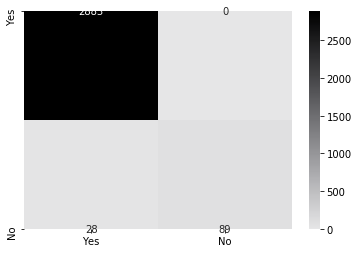

In [25]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Yes','No'],yticklabels=['Yes','No'],annot=True, fmt="d")